In [ ]:
import tensorflow
import matplotlib.pyplot as plt

import os

os.environ['CUDA_DEVICE_ORDER'] = '0' # using GPU
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
(X_train, y_train) , (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [5]:
X_train, X_test = X_train/255.0 , X_test/255.0

In [6]:
X_train_shape = X_train.shape
X_train_resize_etx = (1,)
X_train_reshape_size = X_train_shape + X_train_resize_etx

X_test_shape = X_test.shape
X_test_resize_etx = (1,)
X_test_reshape_size = X_test_shape + X_test_resize_etx
# reshape
X_train = X_train.reshape(X_train_reshape_size)
X_test = X_test.reshape(X_test_reshape_size)

In [7]:
# model construction
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(
        32, 
        kernel_size=(5,5), 
        strides=(1,1),
        padding = 'same',
        activation = 'relu',
        input_shape = (28,28,1)
    ),
    tensorflow.keras.layers.MaxPool2D(
        pool_size = (2,2),
        strides = (2,2)
    ),
    tensorflow.keras.layers.Conv2D(
        64,
        kernel_size = (2,2),
        activation = 'relu',
        padding = 'same'
    ),
    tensorflow.keras.layers.MaxPool2D(
        pool_size = (2,2),
        strides = (2,2)
    ),
    tensorflow.keras.layers.Dropout(
        0.25
    ),
    tensorflow.keras.layers.Flatten(
    ),
    tensorflow.keras.layers.Dense(
        1000,
        activation='relu'
    ),
    tensorflow.keras.layers.Dense(
        10,
        activation = 'softmax'
    )
])

model.summary()

/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730438955.611292   10182 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4129 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     3,137,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,156,098 (12.04 MB)

 Trainable params: 3,156,098 (12.04 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# model setting
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] # check accuarcu based on the test result value (y_)
)

In [9]:
# model training
hist1 = model.fit(X_train,y_train, epochs=5, batch_size= 32 , verbose=1, validation_data=(X_test, y_test))
hist2 = model.fit(X_train,y_train, epochs=10, batch_size= 32 , verbose=1, validation_data=(X_test, y_test))
hist3 = model.fit(X_train,y_train, epochs=15, batch_size= 32 , verbose=1, validation_data=(X_test, y_test))
hist4 = model.fit(X_train,y_train, epochs=20, batch_size= 32 , verbose=1, validation_data=(X_test, y_test))


Epoch 1/5


I0000 00:00:1730438957.613000   12125 service.cc:148] XLA service 0x7fe3b4015ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730438957.613069   12125 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-01 14:29:17.639256: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730438957.735738   12125 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-01 14:29:18.615175: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_569', 112 bytes spill stores, 112 bytes spill loads

2024-11-01 14:29:19.118945: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_569

  82/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6174 - loss: 1.2067

I0000 00:00:1730438960.629994   12125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9252 - loss: 0.2450

2024-11-01 14:29:24.459344: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_66', 112 bytes spill stores, 112 bytes spill loads



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9256 - loss: 0.2439 - val_accuracy: 0.9888 - val_loss: 0.0354
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9872 - loss: 0.0445 - val_accuracy: 0.9866 - val_loss: 0.0376
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9909 - loss: 0.0308 - val_accuracy: 0.9926 - val_loss: 0.0247
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9916 - val_loss: 0.0298
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9940 - loss: 0.0191 - val_accuracy: 0.9928 - val_loss: 0.0234
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9916 - val_loss: 0.0328
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9953 - loss: 0.0134 - val_accuracy: 0.9911 - val_loss: 0.0306
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9960 - loss: 0.0115 - val_accuracy: 0

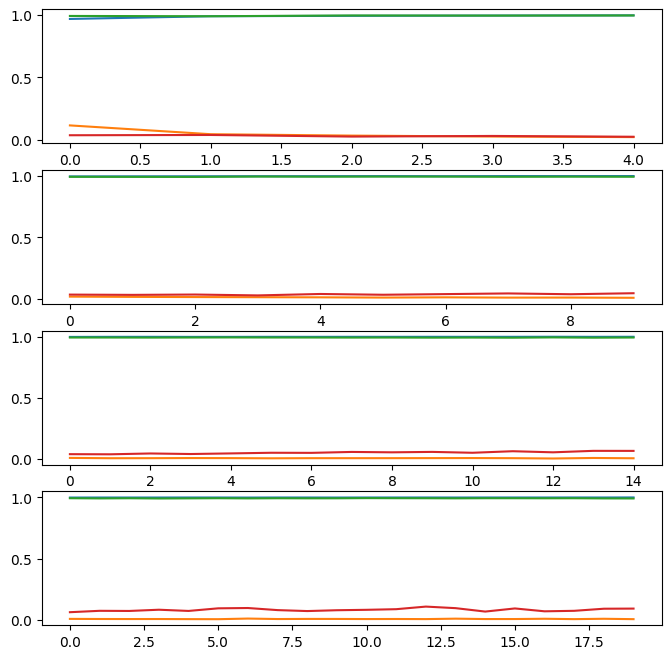

In [11]:
fig , axs = plt.subplots(4,1, figsize = (8,8))

target = [*hist1.history]

for each in target:
    axs[0].plot(hist1.history[each])
    axs[1].plot(hist2.history[each])
    axs[2].plot(hist3.history[each])
    axs[3].plot(hist4.history[each])
